In [66]:
import pandas as pd
import seaborn as sns
Tips = sns.load_dataset('tips')
Tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [67]:
# correlation matrix
cor=Tips.corr()
cor

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


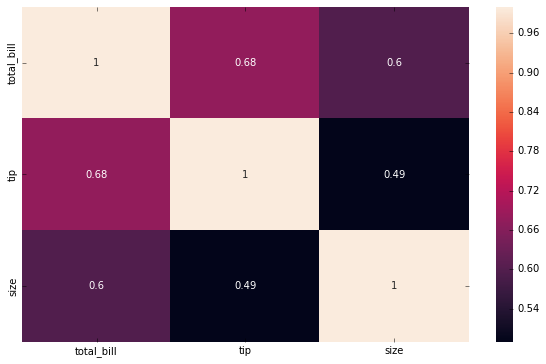

In [6]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
# plotting Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

In [68]:
Tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [8]:
Tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
# Skewness
Tips.skew()

total_bill    1.133213
tip           1.465451
size          1.447882
dtype: float64

c:\users\victoria\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\victoria\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\victoria\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not lay

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003B8E3EE208>,
      dtype=object)

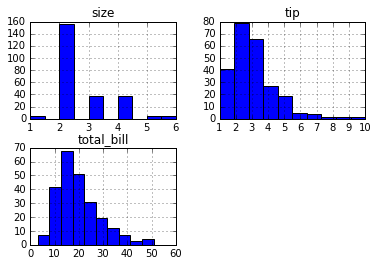

In [10]:
Tips.hist()

# Select Features for ML

In [12]:
#Feature Importance  of tips dataset for time
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
X = Tips.iloc[:, [0,1,6]].values
y =Tips.iloc[:, 5].values
a=rnd_clf.fit(X, y)
for name, score in zip(Tips[['total_bill','tip','size']], rnd_clf.feature_importances_):
    print(name, score)

total_bill 0.5508767251235362
tip 0.3611178457413114
size 0.0880054291351524


In [13]:
#Feature Importance  of tips dataset for sex
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
X = Tips.iloc[:, [0,1,6]].values
y =Tips.iloc[:, 2].values
a=rnd_clf.fit(X, y)
for name, score in zip(Tips[['total_bill','tip','size']], rnd_clf.feature_importances_):
    print(name, score)

total_bill 0.5577667806756366
tip 0.38372915406541513
size 0.0585040652589482


In [14]:
#Feature Importance  of tips dataset for Smoker
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
X = Tips.iloc[:, [0,1,6]].values
y =Tips.iloc[:, 3].values
a=rnd_clf.fit(X, y)
for name, score in zip(Tips[['total_bill','tip','size']], rnd_clf.feature_importances_):
    print(name, score)

total_bill 0.5588066816393362
tip 0.3698906234148631
size 0.0713026949458007


In [15]:
#Feature Importance  of tips dataset for day
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
X = Tips.iloc[:, [0,1,6]].values
y =Tips.iloc[:, 4].values
a=rnd_clf.fit(X, y)
for name, score in zip(Tips[['total_bill','tip','size']], rnd_clf.feature_importances_):
    print(name, score)

total_bill 0.5314181851603996
tip 0.38923167139658654
size 0.07935014344301387


# OR for the over all importance of the features

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.59924998 0.40075002]


# Splitting the train_test

In [69]:
Tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [70]:
Tips.sex = Tips.sex.map({"Male": 0,"Female": 1})

In [71]:
X = Tips.iloc[:, [0,1]].values
y =Tips.iloc[:, 2]
y

0      1
1      0
2      0
3      0
4      1
      ..
239    0
240    1
241    0
242    0
243    1
Name: sex, Length: 244, dtype: category
Categories (2, int64): [0, 1]

In [72]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [73]:
print(X_train.shape) 
print(X_test.shape) 

(170, 2)
(74, 2)


In [74]:
print(y_train.shape) 
print(y_test.shape) 

(170,)
(74,)


In [75]:
y

0      1
1      0
2      0
3      0
4      1
      ..
239    0
240    1
241    0
242    0
243    1
Name: sex, Length: 244, dtype: category
Categories (2, int64): [0, 1]

# Model Evaluation

In [76]:
from sklearn.neighbors import KNeighborsClassifier
# To check accuracy, we need to import Metrics model as follows; 
from sklearn import metrics 
Range_k = range(1,10) 
scores = {} 
scores_list = [] 
for k in Range_k: 
    classifier = KNeighborsClassifier(n_neighbors=k) 
    classifier.fit(X_train, y_train) 
    y_pred = classifier.predict(X_test) 
    scores[k] = metrics.accuracy_score(y_test,y_pred) 
    scores_list.append(metrics.accuracy_score(y_test,y_pred)) 
result = metrics.confusion_matrix(y_test, y_pred) 
print("Confusion Matrix:") 
print(result) 
result_1 = metrics.classification_report(y_test, y_pred) 
print("Classification Report:",) 
print (result_1)


Confusion Matrix:
[[38 10]
 [18  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        48
           1       0.44      0.31      0.36        26

    accuracy                           0.62        74
   macro avg       0.56      0.55      0.55        74
weighted avg       0.60      0.62      0.60        74



Text(0, 0.5, 'Accuracy')

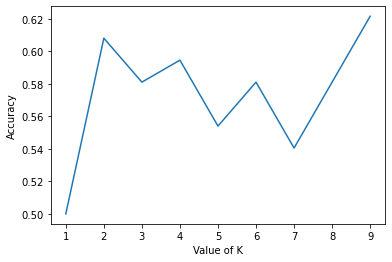

In [77]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.plot(Range_k,scores_list) 
plt.xlabel("Value of K") 
plt.ylabel("Accuracy") 

In [78]:
classifier = KNeighborsClassifier(n_neighbors=2) 
classifier.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=2)

In [79]:
classes = {0:'Male',1:'Female'} 
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [80]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6081081081081081


In [81]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.6216216216216216


In [83]:
result2 = metrics.confusion_matrix(y_test, pred) 
print("Confusion Matrix:") 
print(result2) 
result3 = metrics.classification_report(y_test, pred) 
print("Classification Report:",) 
print (result3)

Confusion Matrix:
[[46  2]
 [26  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.96      0.77        48
           1       0.00      0.00      0.00        26

    accuracy                           0.62        74
   macro avg       0.32      0.48      0.38        74
weighted avg       0.41      0.62      0.50        74



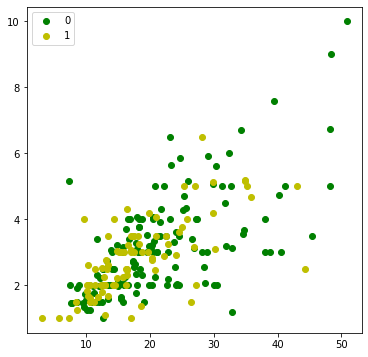

In [84]:
X = Tips.iloc[:, [0,1]].values
y =Tips.iloc[:, 2]
# Logistic regression
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
plt.legend();

In [85]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
digreg = LogisticRegression(random_state = 42)
digreg.fit(X_train, y_train)
y_pred = digreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.7526000157651817

In [23]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X,y)
predictions1 = tree_reg.predict(X)
tree_mse = mean_squared_error(y, predictions1)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [26]:
from sklearn.ensemble import RandomForestRegressor
Ranfor = RandomForestRegressor()
Ranfor.fit(X,y)
predictions3 = Ranfor.predict(X)
Ran_mse = mean_squared_error(y, predictions3)
Ran_rmse = np.sqrt(Ran_mse)
Ran_rmse

0.3185308230703924

In [27]:
from sklearn.neighbors import KNeighborsRegressor
Regknn = KNeighborsRegressor()
Regknn.fit(X,y)
predictions2 = Regknn.predict(X)
knn_mse = mean_squared_error(y, predictions2)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.6568678785235776

In [28]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(lin_reg, X, y, scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(lin_reg_rmse_scores)


Scores: [0.68075533 0.71338044 0.58757795 0.72706058 0.58625199 1.04771488
 0.98646708 1.01995131 0.62753122 0.62740397]
Mean: 0.7604094773343704
Standard deviation: 0.17499306479345894


In [29]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(tree_reg, X, y, scoring="neg_mean_squared_error", cv=10)
tree_reg_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_reg_rmse_scores)

Scores: [1.05830052 0.77459667 1.07703296 1.14891253 1.02062073 1.2416387
 1.         1.17260394 1.25830574 1.        ]
Mean: 1.0752011791875078
Standard deviation: 0.13457002244355715


In [30]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(Ranfor, X, y, scoring="neg_mean_squared_error", cv=10)
Ranfor_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(Ranfor_rmse_scores)

Scores: [0.74441118 0.72412154 0.86620783 0.85770858 0.68089096 0.98232929
 0.92823758 1.08710817 0.86742675 0.82038355]
Mean: 0.8558825408879474
Standard deviation: 0.11687668517084414


In [32]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(Regknn, X, y, scoring="neg_mean_squared_error", cv=10)
Regknn_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(Regknn_rmse_scores)

Scores: [0.75259551 0.69742383 0.61188234 0.85790442 0.6544718  0.99163165
 0.95131488 1.05908766 0.72686542 0.68799225]
Mean: 0.7991169755786499
Standard deviation: 0.14741797496245687


In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train) 


In [18]:
# Fitting KNeighborsRegressor to the Training set
from sklearn.neighbors import KNeighborsRegressor
Regknn = KNeighborsRegressor(n_neighbors=8)
Regknn.fit(X_train, y_train)
# Predicting the Test set results
y_pred = Regknn.predict(X_test)
y_pred

array([2.625, 2.25 , 2.625, 2.   , 2.5  , 1.875, 2.375, 3.625, 2.375,
       3.125, 3.625, 3.25 , 2.125, 2.   , 2.   , 3.75 , 2.   , 2.   ,
       2.625, 3.25 , 3.   , 2.5  , 2.5  , 2.125, 2.   , 2.75 , 2.   ,
       3.5  , 3.75 , 2.375, 2.125, 2.   , 2.25 , 2.25 , 2.25 , 2.   ,
       2.375, 1.875, 4.25 , 2.125, 1.875, 2.   , 2.125, 3.875, 2.   ,
       2.25 , 2.25 , 2.875, 2.5  ])

In [ ]:
from sklearn.metrics import mean_squared_error
